### Importing scraper and necessary libraries

In [1]:
from scraper import listing_df
import pandas as pd
import matplotlib.pyplot as plt
from datetime import date
import seaborn as sns

### Initializing Dataframe 

In [2]:
df = listing_df

### Checking and dropping NaN values if any

In [3]:
print(df.isna().sum())

prop_ID       0
rent_pw       0
suburb        0
avail_date    0
bills_inc     0
prop_pop      0
beds          0
baths         0
dtype: int64


### Exploring dataset

In [4]:
df.describe()

,prop_ID,rent_pw,suburb,avail_date,bills_inc,prop_pop,beds,baths
count,252,252,252,252,252,252,252,252
unique,252,85,124,36,2,8,6,4
top,share-house-sydney-randwick-2031-P1044205,300,Mascot,Available Now,Yes,0,2,2
freq,1,20,17,159,146,57,76,118


### Checking for duplicates

In [5]:
try:
    print(pd.concat(x for _, x in df.groupby("prop_ID") if len(x) > 1))
except ValueError as err:
    print("No duplicates found!")

No duplicates found!


### Removing duplicates if any

In [6]:
df.drop_duplicates(inplace=True)

### Formatting columns to relevant types

In [7]:
 # Removing commas from the rent column
df["rent_pw"] = df["rent_pw"].replace(",","",regex=True)

# Converting beds, baths, rent_pw, prop_pop columns to int
df[["prop_pop","beds","baths","rent_pw"]] = df[["prop_pop","beds","baths","rent_pw"]].apply(pd.to_numeric)

# Removing "Available " from avail_date column
df["avail_date"] = df["avail_date"].replace("Available ","",regex=True)

# Replacing "Now" with today's date
df.loc[(df["avail_date"]=="Now"), "avail_date"] = date.today()

# Converting avail_date column to datetime data type
df["avail_date"] = pd.to_datetime(df["avail_date"]) 

In [8]:
df.head(10)

,prop_ID,rent_pw,suburb,avail_date,bills_inc,prop_pop,beds,baths
0,share-house-sydney-randwick-2031-P1044205,500,Randwick,2022-12-02,Yes,3,3,2
1,share-house-sydney-randwick-2031-P1040545,550,Randwick,2022-12-06,Yes,1,3,2
2,share-house-sydney-redfern-2016-P1197536,385,Redfern,2022-11-29,Yes,2,2,2
3,share-house-sydney-marrickville-2204-P1268117,320,Marrickville,2022-12-12,Yes,5,5,1
4,share-house-sydney-lavender-bay-2060-P1240929,540,Lavender Bay,2023-01-02,Yes,2,2,2
5,share-house-sydney-st-peters-2044-P1175196,345,St Peters,2022-11-29,Yes,7,6,4
6,share-house-sydney-chatswood-2067-P1029925,345,Chatswood,2022-11-29,Yes,7,6,2
7,share-house-sydney-parramatta-2150-P284733,300,Parramatta,2022-12-17,Yes,3,2,2
8,studio-sydney-strathfield-2135-P1267719,420,Strathfield,2022-11-29,Yes,0,1,1
9,share-house-sydney-palm-beach-2108-P1247120,550,Palm Beach,2022-11-29,Yes,3,3,3


### Getting property type from the `prop_ID` column

In [9]:
# Initializing a property type column from the prop_ID column
prop_type = df["prop_ID"].str.split("-sydney", n=1, expand=True)

# Setting prop_type column first array element (first split)
df["prop_type"] = prop_type[0]

# Replacing "-" with spaces to clean up column
df["prop_type"] = df["prop_type"].replace("-"," ",regex=True)

# Capitalizing column values
df["prop_type"] = df["prop_type"].str.capitalize()

In [10]:
df.head(10)

,prop_ID,rent_pw,suburb,avail_date,bills_inc,prop_pop,beds,baths,prop_type
0,share-house-sydney-randwick-2031-P1044205,500,Randwick,2022-12-02,Yes,3,3,2,Share house
1,share-house-sydney-randwick-2031-P1040545,550,Randwick,2022-12-06,Yes,1,3,2,Share house
2,share-house-sydney-redfern-2016-P1197536,385,Redfern,2022-11-29,Yes,2,2,2,Share house
3,share-house-sydney-marrickville-2204-P1268117,320,Marrickville,2022-12-12,Yes,5,5,1,Share house
4,share-house-sydney-lavender-bay-2060-P1240929,540,Lavender Bay,2023-01-02,Yes,2,2,2,Share house
5,share-house-sydney-st-peters-2044-P1175196,345,St Peters,2022-11-29,Yes,7,6,4,Share house
6,share-house-sydney-chatswood-2067-P1029925,345,Chatswood,2022-11-29,Yes,7,6,2,Share house
7,share-house-sydney-parramatta-2150-P284733,300,Parramatta,2022-12-17,Yes,3,2,2,Share house
8,studio-sydney-strathfield-2135-P1267719,420,Strathfield,2022-11-29,Yes,0,1,1,Studio
9,share-house-sydney-palm-beach-2108-P1247120,550,Palm Beach,2022-11-29,Yes,3,3,3,Share house


### Describing dataset after converting columns to relevant data types

In [11]:
df.describe()

,rent_pw,prop_pop,beds,baths
count,252.000000,252.000000,252.000000,252.000000
mean,419.488095,2.293651,2.857143,1.873016
std,212.543569,2.025996,1.526469,0.869896
min,0.000000,0.000000,1.000000,1.000000
25%,275.000000,1.000000,2.000000,1.000000
50%,350.000000,2.000000,3.000000,2.000000
75%,530.000000,3.000000,4.000000,2.000000
max,1350.000000,7.000000,6.000000,4.000000


## Exploratory Data Analysis

### Exploring rent values

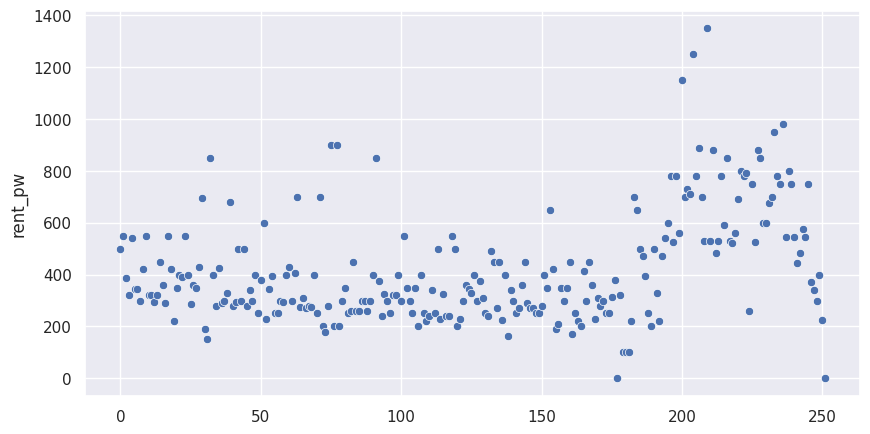

In [12]:
# Creating scatterplot for rent values vs. frequency
sns.set(rc={"figure.figsize":(10,5)})
sns.scatterplot(df["rent_pw"])
plt.show()

### Checking distribution of rent values

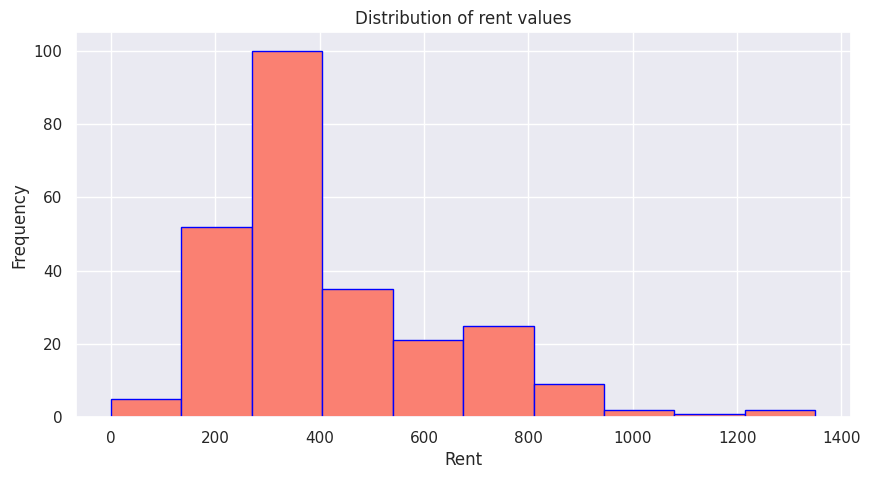

In [15]:
# Plotting frequency histogram to check distribution of rent values
sns.set(rc={"figure.figsize":(10,5)})
plt.hist(df["rent_pw"],color="salmon",edgecolor="blue")

plt.title("Distribution of rent values")
plt.xlabel("Rent")
plt.ylabel("Frequency")
plt.show()

### Heatmap to look for patterns

#### Statement : Rent is directly proportional to beds and baths

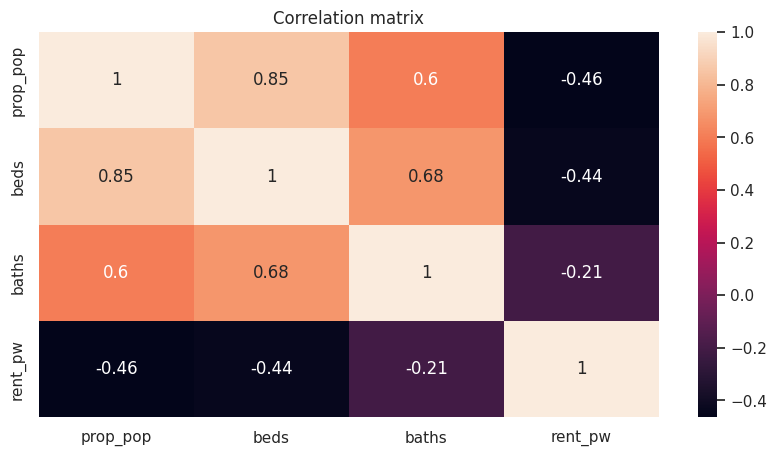

In [16]:
# Creating a view with only numerical values
numerical_data = df[["prop_pop","beds","baths","rent_pw"]]

# creating a heatmap of correlation amongst values
sns.set(rc={"figure.figsize":(10,5)}) 
sns.heatmap(numerical_data.corr(),annot=True)

plt.title("Correlation matrix")
plt.show()

##### Negative correlation amongst rent, beds and bathrooms indicates that rent does not necessarily increase with respect to number of beds and baths. Hence it is not directly proportional.

### Checking rent values

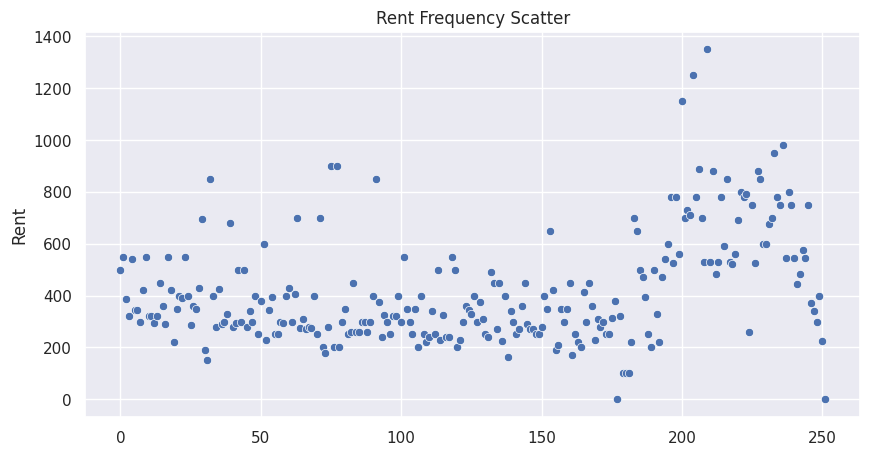

In [17]:
# Checking for more outliers by creating scatterplot
sns.set(rc={"figure.figsize":(10,5)})
sns.scatterplot(df["rent_pw"])
plt.ylabel("Rent")
plt.title("Rent Frequency Scatter")
plt.show()

### Finding the minimum rent with bills included

In [18]:
# Creating views where bills are included in rent
view = df.loc[(df["bills_inc"] == "Yes")]

# Getting rows with minimum rent where bills are included
view.loc[(view["rent_pw"] == view["rent_pw"].min())]

,prop_ID,rent_pw,suburb,avail_date,bills_inc,prop_pop,beds,baths,prop_type
251,share-house-sydney-illawong-2234-P1261324,0,Illawong,2022-11-29,Yes,2,3,1,Share house


### Finding minimum rent where share houses have 1 bathroom per 2 people

Property population was increased by 1 to simulate the number of bathrooms available per person after one more person moves into the property. 

In [19]:
# Creating bath-to-pop ratio column (rounded to one decimal)
df["bath_to_pop_ratio"] = (df["baths"]/(df["prop_pop"]+1)).round(1)

# Getting share houses where there are atleast 1 bathroom per 2 bedrooms
view = df.loc[(df["bath_to_pop_ratio"] >= 0.5) & (df["prop_type"] == "Share house")]

# getting minimum rent where there are atleast 1 bathroom per 2 bedrooms
view.loc[(view["rent_pw"] == view["rent_pw"].min())]

,prop_ID,rent_pw,suburb,avail_date,bills_inc,prop_pop,beds,baths,prop_type,bath_to_pop_ratio
177,share-house-sydney-penrith-2750-P955039,0,Penrith,2022-11-29,No,1,3,2,Share house,1.0


### Share houses with a population between 1 and 3

In [20]:
# Creating views to get share houses with a population in range 1 - 3 (inclusive)
view = df.loc[(df["prop_pop"] >= 1) & (df["prop_pop"] <= 3) & (df["prop_type"] == "Share house")]
view.loc[(view["rent_pw"] == view["rent_pw"].min())]

,prop_ID,rent_pw,suburb,avail_date,bills_inc,prop_pop,beds,baths,prop_type,bath_to_pop_ratio
177,share-house-sydney-penrith-2750-P955039,0,Penrith,2022-11-29,No,1,3,2,Share house,1.0
251,share-house-sydney-illawong-2234-P1261324,0,Illawong,2022-11-29,Yes,2,3,1,Share house,0.3


### Average rent by property type

In [21]:
avg_rent_per_prop = df.groupby(["prop_type"], as_index=False).mean()
avg_rent_per_prop = avg_rent_per_prop[["prop_type","rent_pw"]]
avg_rent_per_prop.columns = ["Prop_type","Average Rent"]
avg_rent_per_prop

/tmp/ipykernel_33467/3086092966.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  avg_rent_per_prop = df.groupby(["prop_type"], as_index=False).mean()


,Prop_type,Average Rent
0,1 bed,747.307692
1,Granny flat,407.500000
2,Homestay,203.333333
3,Share house,339.988827
4,Student accommodation,418.666667
5,Studio,486.000000
6,Whole property,972.727273


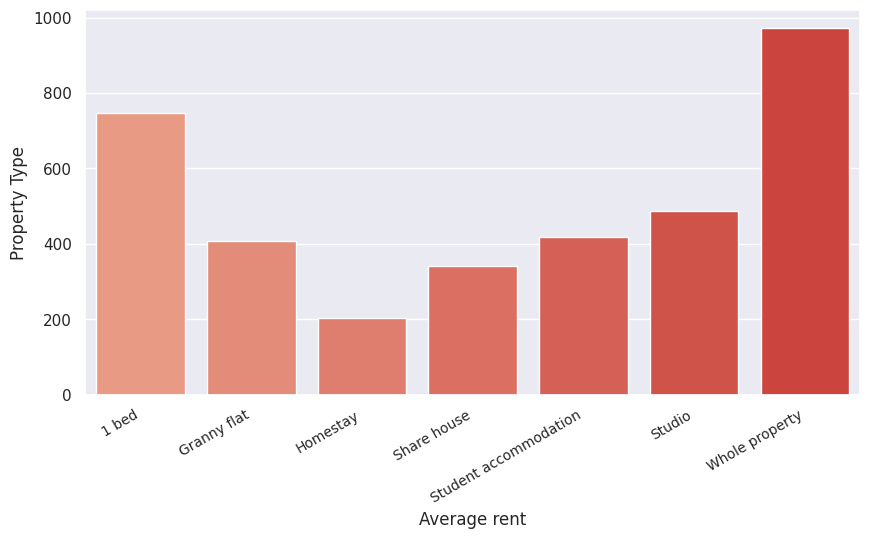

In [22]:
sns.set(rc={"figure.figsize":(10,5)})
palette = sns.color_palette("Reds_d", len(avg_rent_per_prop)+6)
fig = sns.barplot(avg_rent_per_prop,x="Prop_type",y="Average Rent",palette=palette)
fig.set_xticklabels(fig.get_xticklabels(),fontsize=10, rotation =30, ha="right")
plt.ylabel("Property Type")
plt.xlabel("Average rent")
plt.show() 

### Properties available in the next 10 days

In [23]:
# Initializing empty column
df["days_to_avail"] = ""

# Converting datetime.date into datetime64 data type
today = pd.to_datetime(date.today())

# Filling column with difference of dates
df["days_to_avail"] = (df["avail_date"] - today)

# Convertin column to string
df["days_to_avail"] = df["days_to_avail"].astype("string")

# Splitting column strings to remove " days"
days = df["days_to_avail"].str.split(" ", n=1,expand=True)

# Replacing column values with numeric part
df["days_to_avail"] = days[0]

# Converting column to numeric
df["days_to_avail"] = pd.to_numeric(df["days_to_avail"])

# Initializing the number of days
days = 10

# Selecting properties that are available in the next 10 days
view = df.loc[(df["days_to_avail"] == days)]

# Printing count of available properties
print(f'{view["prop_ID"].count()} properties available in {days} days')



1 properties available in 10 days
